<a href="https://colab.research.google.com/github/kristynatasha/YouTube-Transcript-NLTK/blob/main/YouTube_NLTK_WatchHistory_fromIDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/YoutubeDataScraping

transcripts.json  watch_history_ids.json


# Iterate

In [ ]:
pip install youtube-transcript-api

In [ ]:
import json
from youtube_transcript_api import YouTubeTranscriptApi

# Load video IDs from the JSON file
with open('/content/drive/MyDrive/YoutubeDataScraping/watch_history_ids.json', 'r') as json_file:
    video_ids = json.load(json_file)

# Create an empty list to store the transcripts
transcripts = []

# Iterate through the list of video IDs
for video_id in video_ids:
    try:
        # Get the transcript for the video
        transcript = YouTubeTranscriptApi.get_transcript(video_id)

        # Add the transcript to the list
        transcripts.append({
            'video_id': video_id,
            'transcript': transcript
        })

    except Exception as e:
        print(f"Error processing video {video_id}: {e}")

# Now, the 'transcripts' list contains transcripts for each video
# You can further process or save this data as needed
# Save the transcripts to a JSON file
output_file = '/content/drive/MyDrive/YoutubeDataScraping/transcripts.json'
with open(output_file, 'w', encoding='utf-8') as json_file:
    json.dump(transcripts, json_file, ensure_ascii=False, indent=4)

print(f"Transcripts saved to {output_file}")

In [ ]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load the JSON file containing transcripts
with open('/content/drive/MyDrive/YoutubeDataScraping/transcripts.json', 'r', encoding='utf-8') as json_file:
    transcripts = json.load(json_file)

# Initialize a list to store all words
all_words = []

# Tokenize and preprocess each transcript
for entry in transcripts:
    transcript_text = ' '.join([item['text'] for item in entry['transcript']])
    words = word_tokenize(transcript_text.lower())  # Tokenize and convert to lowercase
    all_words.extend(words)

# Filter out stopwords

additional_stopwords = {'20', 'I', 'So', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'along', 'already', 'also', 'an', 'and', 'another', 'any', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'away', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'come', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'during', 'each', 'else', 'ever', 'every', 'everyone', 'everything', 'few', 'fine', 'first', 'five', 'for', 'four', 'from', 'further', 'get', 'getting', 'go', 'god', 'good', 'got', 'guy', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hey', 'him', 'his', 'how', 'however', 'i', 'if', 'in', 'indeed', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'just', 'kind', 'know', 'last', 'let', 'like', 'll', 'long', 'look', 'lot', 'made', 'make', 'making', 'man', 'many', 'may', 'me', 'mean', 'means', 'might', 'more', 'most', 'much', 'must', 'mustn', "mustn't", 'my', 'name', 'need', 'never', 'nevertheless', 'next', 'nice', 'no', 'none', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'oh', 'on', 'once', 'one', 'only', 'or', 'other', 'our', 'out', 'over', 'own', 'particular', 'people', 'perhaps', 'pretty', 'quite', 'really', 'real', 're', 's', 'said', 'same', 'say', 'saying', 'seems', 'seen', 'several', 'shall', 'shan', "shan't", 'she', 'should', 'shouldn', "shouldn't", 'since', 'so', 'some', 'someone', 'something', 'sometimes', 'still', 'stop', 'stuff', 'sure', 'ta', 'take', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'thing', 'things', 'think', 'this', 'those', 'though', 'three', 'through', 'to', 'too', 'trying', 'two', 'uh', 'under', 'up', 'us', 'use', 'usually', 've', 'very', 'wait', 'want', 'way', 'we', 'well', 'were', 'weren', "weren't", 'what', 'when', 'where', 'wherever', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'without', 'won', "won't", 'work', 'would', 'wouldn', "wouldn't", 'y', 'yeah', 'yes', 'yet', 'you', 'your', 'add', 'great', 'feel', 'anything', 'keep', 'always', 'wow', 'place', 'looking', 'enough', 'try', 'second', 'end', 'able', 'makes', 'least', 'gets', 'causing', 'help', 'cool', 'find', 'sorry', 'left', 'finally', 'literally', 'whole', 'reason', 'close', 'yo', 'times', 'top', 'today', 'using', 'stating', '10', 'different', 'definitely', 'tell', 'far', 'hear', 'course', 'wo', 'whatever', 'coming', 'lost', 'right', 'okay', 'na', 'gon', 'going', 'see', 'actually', 'even', 'could', 'back', 'bro', 'ca', 'thank', 'give', 'little', 'um', 'maybe', 'dude', 'please', 'bit', 'probably', 'put', 'listen', 'idea', 'feels', 'remember', 'six'}

stop_words = set(stopwords.words('english')).union(additional_stopwords)

filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]


# Calculate word frequencies
fdist = FreqDist(filtered_words)

# Get the most common words as keywords (adjust the number as needed)
num_keywords = 100
keywords = [word for word, freq in fdist.most_common(num_keywords)]

# Print the most common words as keywords
print("Keywords:")
for keyword in keywords:
  print(keyword)


In [ ]:
# Calculate word frequencies
fdist = FreqDist(filtered_words)

# Get the most common words as keywords (adjust the number as needed)
num_keywords = 100
keywords = [word for word, freq in fdist.most_common(num_keywords)]

# Print the most common words as keywords
#print("Keywords:")
#for keyword in keywords:
#    print(keyword)

# Calculate the frequency of each keyword
keyword_frequencies = {keyword: fdist[keyword] for keyword in keywords}

# Print the frequency of each keyword
print("\nKeyword Frequencies:")
for keyword, frequency in keyword_frequencies.items():
    print(f"{keyword}: {frequency}")


Keyword Frequencies:
time: 289
life: 202
energy: 200
universe: 164
light: 153
years: 153
theory: 150
number: 148
called: 142
force: 133
earth: 125
world: 124
new: 122
sun: 112
space: 107
surface: 106
mars: 102
cells: 102
gravity: 97
black: 95
point: 94
quantum: 94
together: 89
big: 89
music: 87
part: 86
physics: 84
human: 80
information: 75
air: 74
group: 71
science: 70
speed: 70
stars: 70
squared: 70
example: 68
fact: 67
1: 67
question: 67
2: 67
sleep: 66
important: 66
video: 64
body: 64
start: 64
humans: 63
electron: 63
understand: 62
string: 62
moving: 61
less: 60
become: 60
create: 60
system: 59
better: 58
change: 58
thought: 58
billion: 58
particles: 58
mass: 57
particle: 57
sense: 55
form: 55
day: 55
possible: 54
room: 54
numbers: 54
happens: 53
million: 53
mission: 51
train: 51
learn: 50
small: 50
questions: 50
matter: 50
used: 50
nuclear: 50
technology: 49
future: 49
star: 49
plus: 49
c: 49
high: 48
comes: 47
hard: 47
takes: 47
basically: 47
virus: 47
holes: 47
minus: 47
worki

# Visualization

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# Buat DataFrame dari kamus keyword_frequencies
df = pd.DataFrame.from_dict(keyword_frequencies, orient='index', columns=['Frekuensi'])

# Urutkan DataFrame berdasarkan frekuensi secara menurun
df = df.sort_values(by='Frekuensi', ascending=False)

# Ambil 20 kata kunci teratas
top_20_keywords = df.head(20)

# Cetak tabel kata kunci teratas
print(top_20_keywords)

          Frekuensi
time            289
life            202
energy          200
universe        164
light           153
years           153
theory          150
number          148
called          142
force           133
earth           125
world           124
new             122
sun             112
space           107
surface         106
mars            102
cells           102
gravity          97
black            95


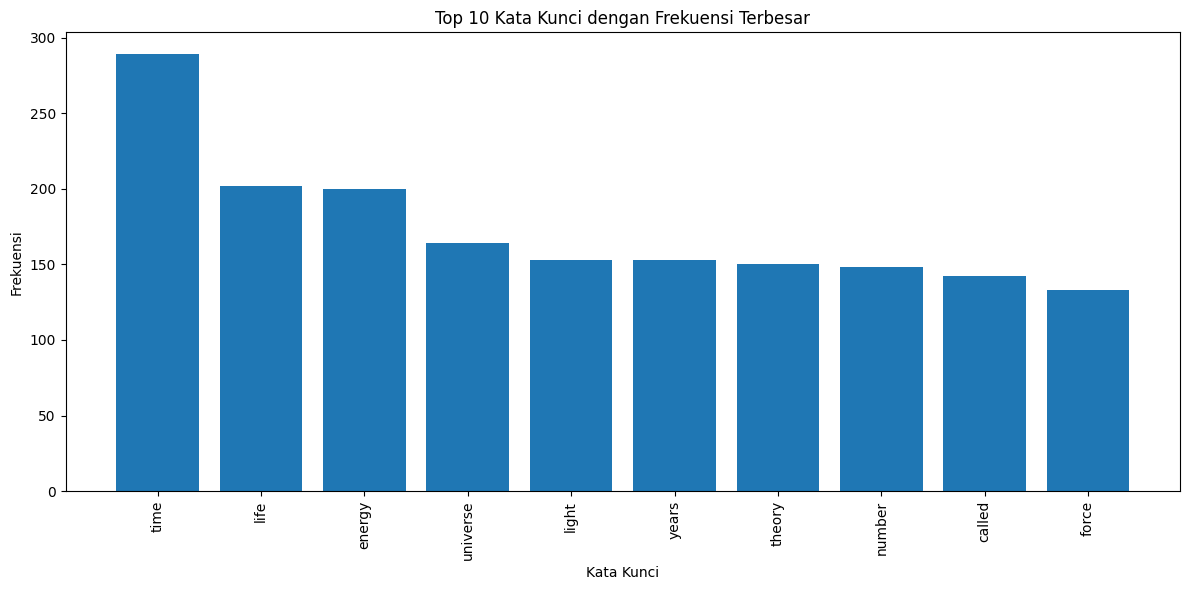

In [ ]:
#tabel
import matplotlib.pyplot as plt
# Ambil 10 kata kunci teratas
top_10_keywords = df.head(10)

# Siapkan data untuk plot
keywords = top_10_keywords.index
frequencies = top_10_keywords['Frekuensi']

# Buat bar graph
plt.figure(figsize=(12, 6))
plt.bar(keywords, frequencies)
plt.xlabel('Kata Kunci')
plt.ylabel('Frekuensi')
plt.title('Top 10 Kata Kunci dengan Frekuensi Terbesar')
plt.xticks(rotation=90)  # Agar label sumbu x tidak tumpang tindih
plt.tight_layout()

# Tampilkan bar graph
plt.show()



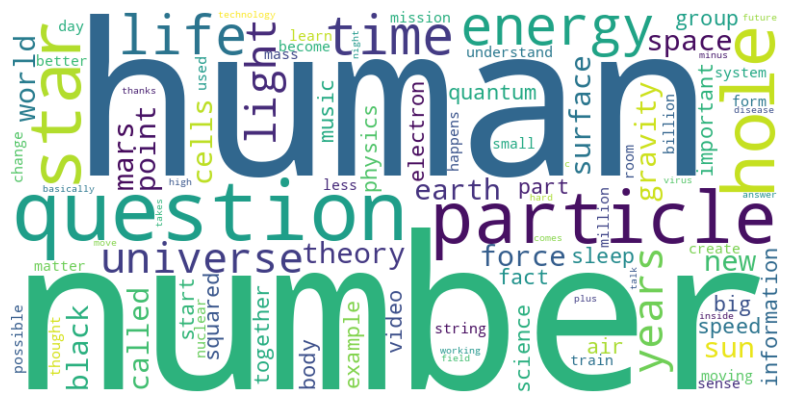

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua kata kunci menjadi satu teks
top_100_keywords = df.head(100)
keywords100 = top_100_keywords.index
all_keywords_text = ' '.join(keywords100)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords_text)

# Membuat plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Menghilangkan sumbu
#plt.title('Word Cloud dari keywords')
plt.show()


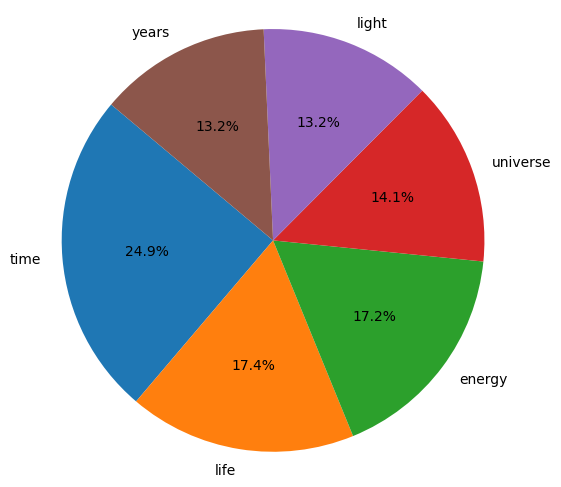

In [ ]:
import matplotlib.pyplot as plt

# Ambil 100 kata kunci teratas
top_6_keywords = df.head(6)

# Siapkan data untuk pie chart
labels = top_6_keywords.index
sizes = top_6_keywords['Frekuensi']

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()